In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np
from scipy.integrate import simps
import seaborn as sns

from neutrons.process.data_processor import SpectrumProcessor


spectrum = pd.read_csv('../data/neutron_spectrum.txt',sep=',')
spectrum.columns = ['Energy','Flux']

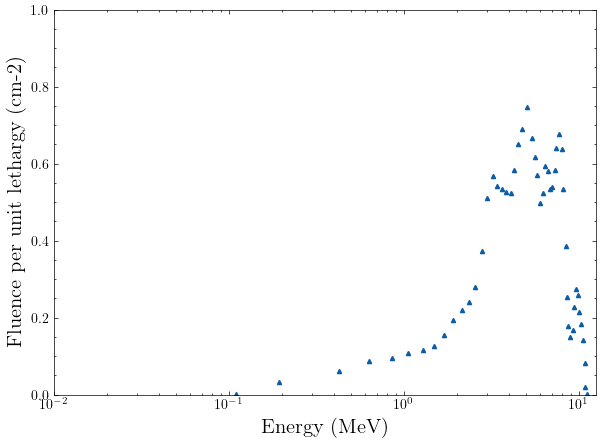

In [28]:
plt.figure(figsize=(7,5))
plt.plot(spectrum['Energy'],spectrum['Flux'], "^", markersize=3)
plt.xscale('log')
plt.ylim(0,1)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Fluence per unit lethargy (cm-2)", fontsize=15)
plt.show()

In [29]:
# Normalize the spectrum
xp = spectrum["Energy"].values # Convert to eV
fp = spectrum["Flux"].values
area_under_curve = simps(fp, xp)
fp_norm = fp/area_under_curve

# Save the normalized spectrum
data = pd.DataFrame({"Energy": xp, "Density": fp_norm})
data.to_csv("../data/neutron_spectrum_normalized.txt", index=False)

/tmp/ipykernel_15262/1665607415.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area_under_curve = simps(fp, xp)


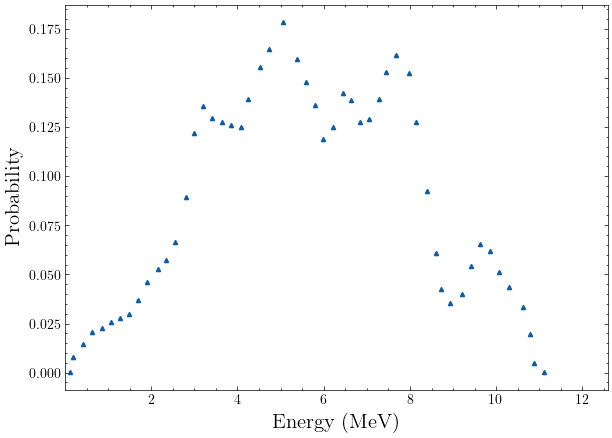

In [30]:
plt.figure(figsize=(7,5))
plt.plot(xp,fp_norm, "^", markersize=3)
plt.xlim(10**-2, 10**1.1)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.show()

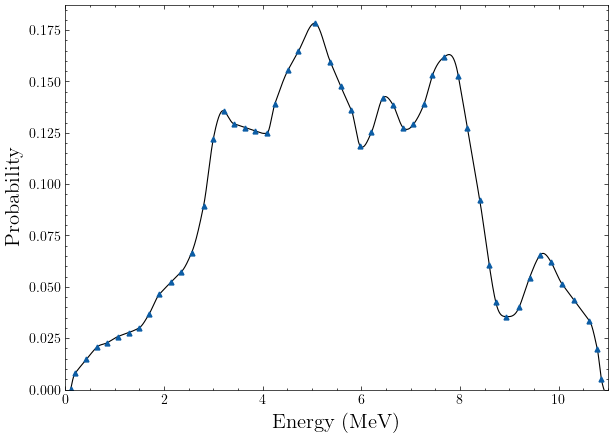

In [31]:
spectrum_processor = SpectrumProcessor(data = data)
x_interp = np.linspace(min(xp), max(xp), 1000000)
y_interp = spectrum_processor.interpolaters[0](x_interp)

plt.figure(figsize=(7,5))
plt.plot(x_interp,y_interp, "-",c="k", linewidth=0.8)
plt.plot(xp,fp_norm, "^", markersize=3.5)
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel(r"Probability", fontsize=15)
plt.xlim(0, 11)
plt.ylim(0)
plt.show()

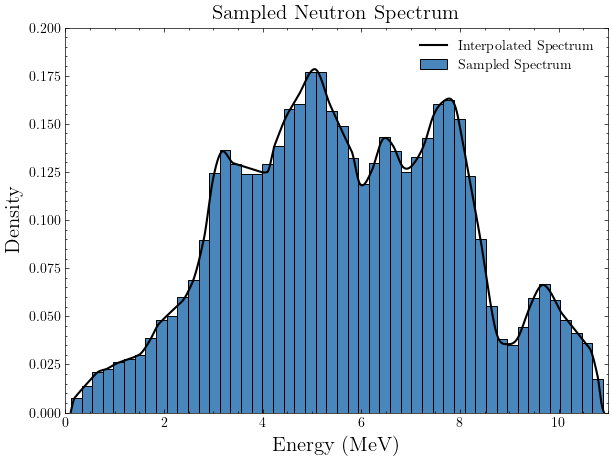

In [32]:
sampled_points = spectrum_processor.sample(100000)

plt.figure(figsize=(7, 5))
plt.plot(x_interp,y_interp, "-", linewidth=1.5, color = "k", label = "Interpolated Spectrum")
sns.histplot(sampled_points, bins=50, stat="density", label = "Sampled Spectrum")
plt.xlabel('Energy (MeV)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.xlim(0, 11)
plt.ylim(0, 0.2)
plt.legend()
plt.title("Sampled Neutron Spectrum", fontsize=15)
plt.show()